EJERCICIO: SISTEMA DE RECOMENDACIÓN BÁSICO USANDO DESCOMPOSICIÓN DE MATRICES (SVD)
PROBLEMA:
Eres parte de un equipo que está desarrollando un sistema de recomendación para una plataforma de películas similar a Netflix. La plataforma tiene datos sobre las calificaciones que diferentes usuarios han dado a diversas películas. Sin embargo, no todos los usuarios han calificado todas las películas, por lo que tienes una matriz incompleta.
El objetivo es predecir las calificaciones que un usuario podría dar a una película no vista, utilizando la descomposición en valores singulares (SVD) para encontrar patrones latentes en las calificaciones.
Datos de Calificaciones
Imagina que tienes una matriz de calificaciones de 5 usuarios y 4 películas. Los valores son las calificaciones (de 1 a 5), y los ceros representan películas que el usuario no ha calificado todavía:

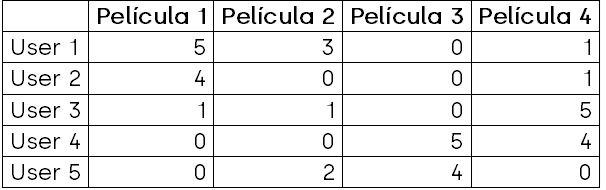


In [1]:
import numpy as np
from numpy.linalg import svd

In [2]:
ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4],
    [0, 2, 4, 0]
])

In [3]:
U, S, Vt = svd(ratings, full_matrices=False)
#svd(): Es una función de la biblioteca numpy.linalg.svd() que realiza la descomposición en valores singulares.
#ratings: Es la matriz que se está descomponiendo
#full_matrices=False: Este argumento especifica si la descomposición debe retornar matrices completas o truncadas

a idea es descomponer una matriz 𝐴 de tamaño m×n en tres matrices:
𝐴=𝑈⋅𝑆⋅𝑉𝑇

U: Matriz ortogonal de tamaño m×m cuyas columnas son los vectores singulares izquierdos.

S: Matriz diagonal (de tamaño m×n) que contiene los valores singulares en el eje diagonal. Estos valores son números no negativos ordenados de mayor a menor.

VT : Transpuesta de la matriz ortogonal V, de tamaño n×n, cuyas filas son los vectores singulares derechos.



In [4]:
S_diag = np.diag(S) #toma un vector o una lista de valores singulares S y lo convierte en una matriz diagonal.

la descomposición en valores singulares (SVD), los valores singulares
S se devuelven como un vector o array unidimensional. Este vector contiene los valores singulares, que son números no negativos ordenados de mayor a menor, y representan la "importancia" o "peso" de cada componente en la descomposición de la matriz original.

Función np.diag()

La función np.diag() de la biblioteca NumPy realiza diferentes operaciones dependiendo de lo que reciba como entrada:

* Si recibe un vector, lo convierte en una matriz diagonal, donde los valores del vector se colocan en la diagonal principal de la matriz y los demás valores fuera de la diagonal se ponen a cero.
* Si recibe una matriz, extrae la diagonal de esa matriz y devuelve los valores en forma de un vector.

In [ ]:
ratings_pred = np.dot(np.dot(U, S_diag), Vt)

Primera operación (np.dot(U, S_diag)): Aquí se realiza la multiplicación de la matriz U por la matriz diagonal S_diag. Esto transforma la matriz 𝑈
al "escala" por los valores singulares correspondientes.

La operación 𝑈⋅𝑆diag ajusta los vectores singulares de U según la importancia de cada dimensión latente (reflejada en los valores singulares).

Segunda operación (np.dot(U * S_diag, Vt)): Luego, el resultado de la primera operación se multiplica por VT para completar la reconstrucción de la matriz.VT representa los vectores singulares derechos que nos permiten ajustar las relaciones entre las columnas de la matriz original.
Resultado (ratings_pred):

El resultado final es una matriz aproximada o reconstruida (llamada ratings_pred en este caso), que intenta ser lo más cercana posible a la matriz original ratings. Dependiendo de si se usan todos los valores singulares o solo los primeros k, esta puede ser una aproximación o la reconstrucción completa de la matriz original.

In [ ]:
print("Matriz aproximada de calificaciones:\n", np.round(ratings_pred, 2))

Matriz aproximada de calificaciones:
 [[ 5.  3.  4.  1.]
 [ 4.  2.  0.  1.]
 [ 1.  1.  0.  5.]
 [ 0.  0.  5.  4.]
 [ 0.  2.  4. -0.]]


Es posible que los resultados obtenidos no sean concluyentes o precisos debido a la naturaleza de los valores singulares y la forma en que la SVD se utiliza para aproximar la matriz. Cuando utilizamos la SVD para reconstruir una matriz, en muchos casos es necesario realizar algunos ajustes adicionales para mejorar la precisión de las predicciones, sobre todo si la matriz original tiene muchos ceros.

1. Problema de la Densidad de la Matriz En el ejercicio, muchos valores en la matriz de calificaciones **son ceros**, lo que representa datos faltantes. **Si la matriz tiene demasiados ceros, puede que el modelo no capture suficiente información para hacer buenas predicciones.**
*Solución: En lugar de usar una SVD simple, un enfoque más común es realizar una factorización de matrices regularizada, que introduce términos que penalizan los errores en la reconstrucción de la matriz para evitar el sobreajuste a los datos escasos.*

**Predicción con Reducción Dimensional**
La SVD produce una aproximación completa de la matriz, pero en la práctica, no necesitamos usar todos los valores singulares. Reducir la cantidad de factores latentes puede mejorar la capacidad del modelo para generalizar y evitar el sobreajuste.

*Solución: Se suele truncar la matriz de valores singulares a los componentes más importantes (reducción dimensional), lo que genera una mejor aproximación.*

In [ ]:
# Código con Truncamiento
import numpy as np
from numpy.linalg import svd

# Matriz de calificaciones
ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4],
    [0, 2, 4, 0]
])

# Descomposición en valores singulares
U, S, Vt = svd(ratings, full_matrices=False)

# Solo usamos los primeros k valores singulares para reducir la dimensionalidad
k = 2  # Elige cuántos factores latentes usar (2 es un buen inicio)
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]

# Aproximación de la matriz usando solo k factores latentes
ratings_pred = np.dot(np.dot(U_k, S_k), Vt_k)

print("Matriz aproximada de calificaciones (con truncamiento):\n", np.round(ratings_pred, 2))


Matriz aproximada de calificaciones (con truncamiento):
 [[ 4.98  1.98 -0.6   1.92]
 [ 3.33  1.31 -0.45  1.24]
 [ 2.05  1.22  1.95  2.67]
 [-0.32  0.78  4.86  4.  ]
 [-0.31  0.35  2.56  2.04]]


**EXPLICACIÓN DEL NUEVO CODIGO**
truncamiento de la descomposición en valores singulares (SVD) para reducir la dimensionalidad y mejorar la generalización del modelo.

Selección del número de factores latentes (k)

In [ ]:
k = 2  # Elige cuántos factores latentes usar (2 es un buen inicio)

Propósito: **Establecemos una variable k que define cuántos factores latentes (o dimensiones) vamos a mantener. Estos factores latentes representan las características más relevantes tanto de los usuarios como de las películas.**
Valor sugerido: Usamos k = 2 para comenzar, lo que significa que nos quedaremos con los 2 factores más importantes que explican las relaciones entre los usuarios y las películas.
Motivación: No usamos todos los factores latentes porque muchos de ellos pueden corresponder a "ruido" o detalles poco significativos en los datos. El objetivo es quedarse solo con los factores que explican la mayor parte de la varianza.

Truncamiento de la matriz U

In [ ]:
U_k = U[:, :k]

Propósito: Aquí seleccionamos las primeras k columnas de la matriz U. La matriz U tiene tantas columnas como usuarios y tantas filas como factores latentes.
Sintaxis:
U[:, :k] significa "toma todas las filas (:) y las primeras k columnas (:k)".
Significado: Esto nos da una versión truncada de la matriz U, que representa a los usuarios en un espacio latente de dimensión k. Cada fila de esta matriz truncada es una representación reducida del perfil de calificaciones de un usuario en términos de los k factores latentes más importantes.

Truncamiento de los valores singulares

In [ ]:
S_k = np.diag(S[:k])

Propósito: Seleccionamos los primeros k valores singulares de la matriz S y los convertimos en una matriz diagonal.
Sintaxis:
S[:k] extrae los primeros k elementos del vector S (que contiene los valores singulares).
np.diag(S[:k]) convierte este vector en una matriz diagonal de tamaño k \times k, con los valores singulares en su diagonal principal.
Significado: Los valores singulares nos indican cuánta información está contenida en cada uno de los factores latentes. Al mantener solo los k más grandes, conservamos los factores que más contribuyen a la explicación de la matriz original.

Truncamiento de la matriz Vt

In [ ]:
Vt_k = Vt[:k, :]

Propósito: Seleccionamos las primeras k filas de la matriz Vt. La matriz Vt tiene tantas filas como factores latentes y tantas columnas como películas.
Sintaxis:
Vt[:k, :] significa "toma las primeras k filas (:k) y todas las columnas (:)".
Significado: Esto nos da una versión truncada de la matriz Vt, que representa las películas en el mismo espacio latente reducido de dimensión k. Cada columna de esta matriz truncada es una representación reducida de una película en términos de los k factores latentes más importantes.

Aproximación de la matriz de calificaciones (predicción)

In [ ]:
ratings_pred = np.dot(np.dot(U_k, S_k), Vt_k)

Propósito: Aquí reconstruimos una aproximación de la matriz de calificaciones original utilizando solo los primeros k factores latentes.
Proceso:
Primero multiplicamos la matriz truncada de usuarios (U_k) con la matriz diagonal truncada de valores singulares (S_k).
Luego, el resultado de esa multiplicación se multiplica por la matriz truncada de películas (Vt_k).
Sintaxis:
np.dot(U_k, S_k) realiza la multiplicación de matrices entre U_k y S_k.
np.dot(np.dot(U_k, S_k), Vt_k) multiplica el resultado por Vt_k.
Significado: Este paso genera una matriz aproximada de calificaciones (ratings_pred) utilizando solo los principales patrones de los datos (los k factores latentes). Los valores en esta nueva matriz representan una versión estimada de la matriz original, incluidas las predicciones para las posiciones que originalmente tenían ceros.